In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [47]:
df=pd.read_csv('./train_loanprediction.csv')
df_test=pd.read_csv('./test_loanprediction.csv')

#univariate analysis
#For categorical features we can use frequency table or bar plots which will calculate the number of each category in a particular variable. For numerical features, probability density plots can be used to look at the distribution of the variable.

In [48]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

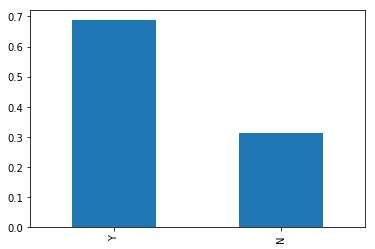

In [49]:
#Target Analysis
df['Loan_Status'].value_counts(normalize=True).plot.bar()

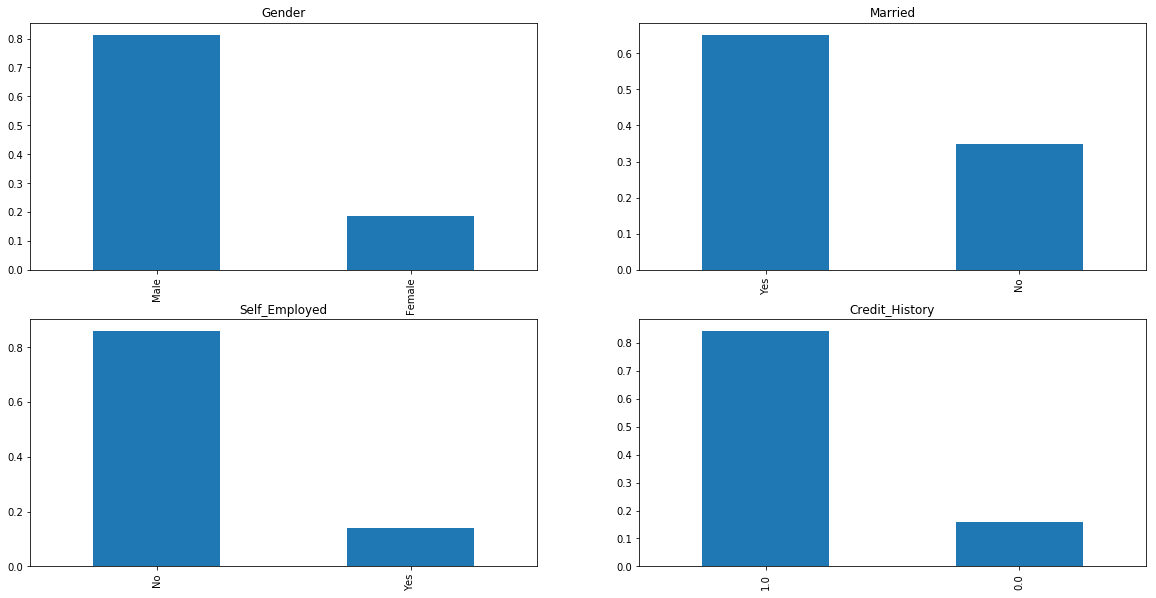

In [50]:
#independent variable categorical analysis
plt.subplot(221);df['Gender'].value_counts(normalize='True').plot(figsize=(20,10),kind='bar',title='Gender')
plt.subplot(222);df['Married'].value_counts(normalize='True').plot(kind='bar',title='Married')
plt.subplot(223);df['Self_Employed'].value_counts(normalize='True').plot(kind='bar',title='Self_Employed')
plt.subplot(224);df['Credit_History'].value_counts(normalize='True').plot(kind='bar',title='Credit_History')

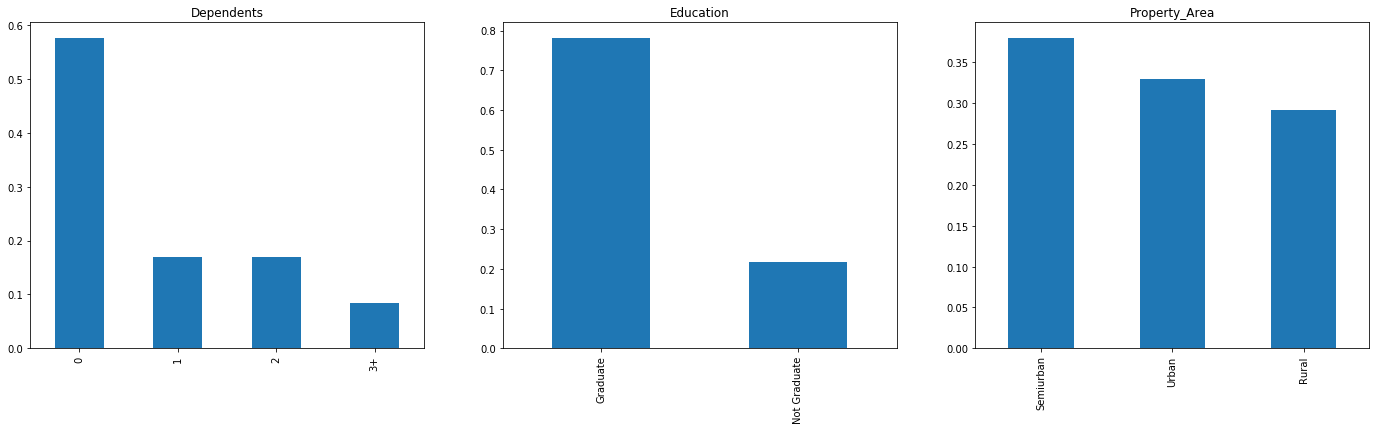

In [51]:
plt.subplot(131);df['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents') 
plt.subplot(132); df['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 
plt.subplot(133); df['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 

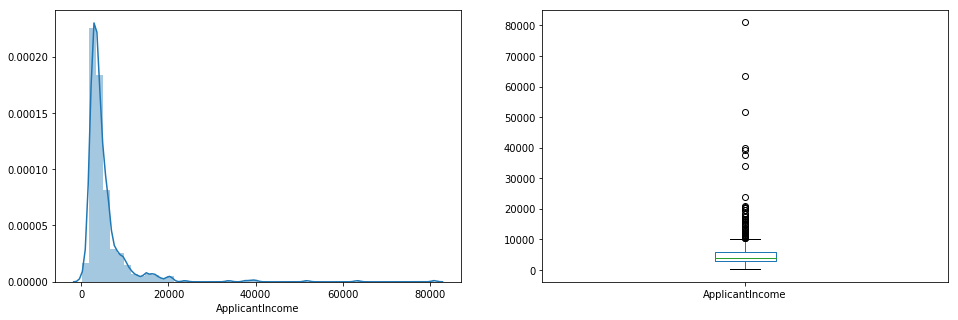

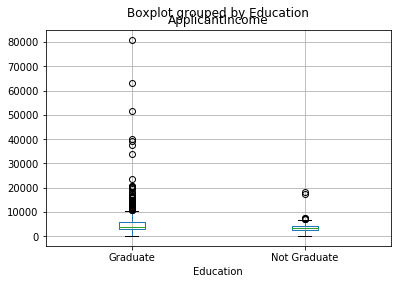

In [52]:
#Numeric variables(ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term)
plt.subplot(121);sns.distplot(df['ApplicantIncome']);
plt.subplot(122);df['ApplicantIncome'].plot.box(figsize=(16,5))
df.boxplot(column='ApplicantIncome',by='Education')

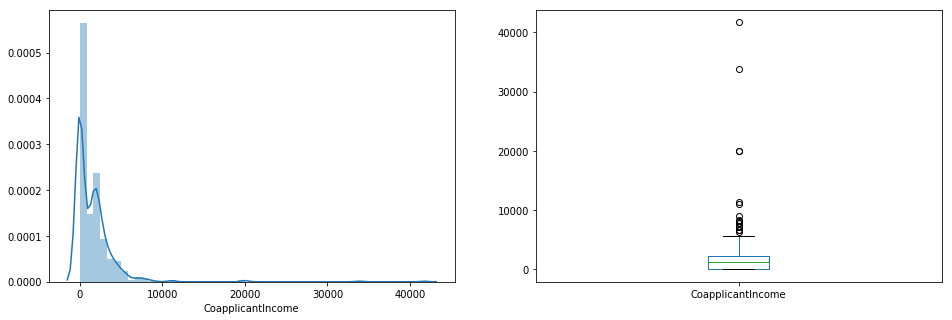

In [53]:
plt.subplot(121);sns.distplot(df['CoapplicantIncome']);
plt.subplot(122);df['CoapplicantIncome'].plot.box(figsize=(16,5))

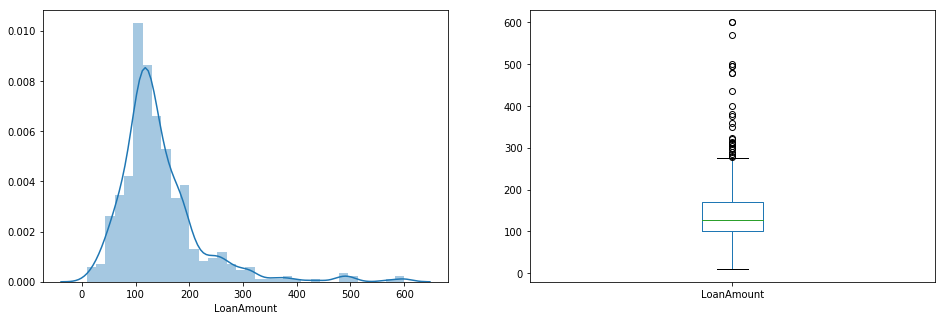

In [54]:
plt.subplot(121);train=df.dropna();sns.distplot(train['LoanAmount']);
plt.subplot(122);train['LoanAmount'].plot.box(figsize=(16,5))

Bivariate analysis

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339
Loan_Status         N         Y
Gender                         
Female       0.330357  0.669643
Male         0.306748  0.693252


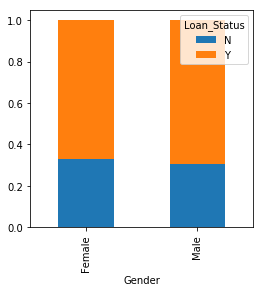

In [55]:
#categorical independent variable wrt to target
gender=pd.crosstab(df['Gender'],df['Loan_Status'])
print(gender)
print(gender.div(gender.sum(1).astype(float),axis=0))
gender.div(gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

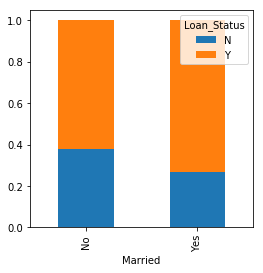

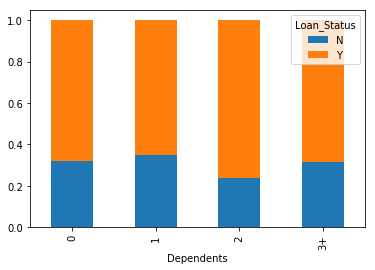

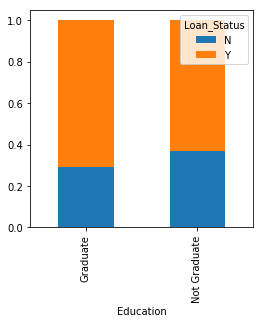

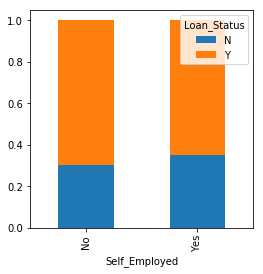

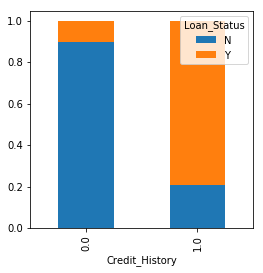

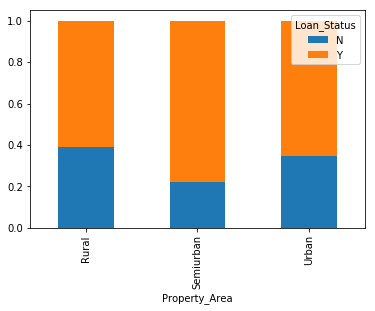

In [56]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status']) 
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status']) 
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)); plt.show() 
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True); plt.show() 
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)); plt.show() 
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)); plt.show()
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status']) 
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)); plt.show() 
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True); plt.show()

#numerical independent variable wrt target

#We will try to find the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved.

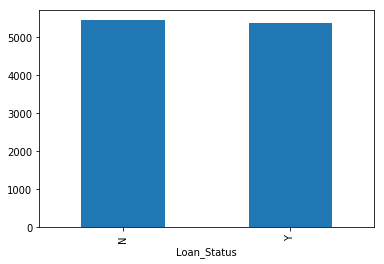

In [58]:
#Salary: Applicants with high income should have more chances of loan approval.
#print(df[df['Loan_Status']=='Y']['ApplicantIncome'].mean())
#print(df[df['Loan_Status']=='N']['ApplicantIncome'].mean())
df.groupby('Loan_Status')['ApplicantIncome'].mean().plot(kind='bar')

Text(0, 0.5, 'Percentage')

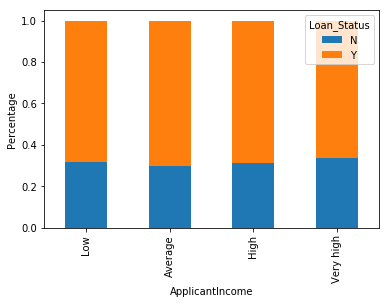

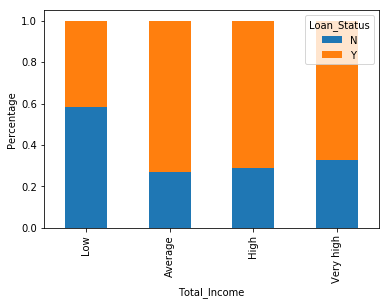

In [59]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
df['Income_bin']=pd.cut(df['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(df['Income_bin'],df['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')

#adding both coapplicantincome and income
df['Total_Income']=df['ApplicantIncome']+df['CoapplicantIncome']
df['Total_Income_bin']=pd.cut(df['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(df['Total_Income_bin'],df['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income')
plt.ylabel('Percentage')


Text(0, 0.5, 'Percentage')

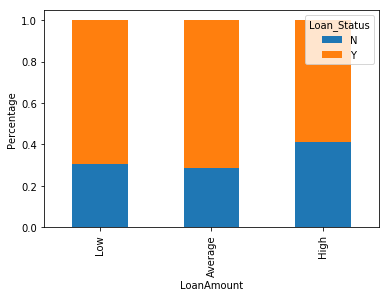

In [60]:
#checking loan amount with loan status
bins=[0,100,200,700] 
group=['Low','Average','High'] 
df['LoanAmount_bin']=pd.cut(df['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(df['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount')
plt.ylabel('Percentage')


In [61]:
df=df.drop(['Income_bin', 'Total_Income', 'Total_Income_bin','LoanAmount_bin'],axis=1)

In [62]:
df['Dependents'].replace('3+',3,inplace=True)
df_test['Dependents'].replace('3+',3,inplace=True)
df['Loan_Status'].replace('N',0,inplace=True)
df['Loan_Status'].replace('Y',1,inplace=True)

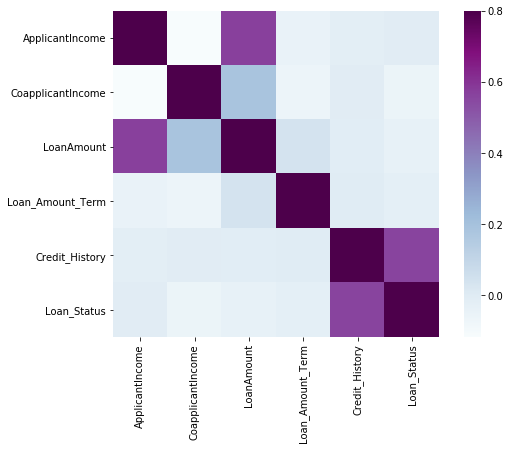

In [63]:
f,ax=plt.subplots(figsize=(9,6))
sns.heatmap(df.corr(), vmax=.8, square=True, cmap="BuPu")


#finding out missing values

In [64]:
print(type(df.isnull().sum()))
print(type(df.dtypes))
pd.concat([df.dtypes,df.isnull().sum()],axis=1)

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


,0,1
Loan_ID,object,0
Gender,object,13
Married,object,3
Dependents,object,15
Education,object,0
Self_Employed,object,32
ApplicantIncome,int64,0
CoapplicantIncome,float64,0
LoanAmount,float64,22
Loan_Amount_Term,float64,14


In [65]:
#missing replaced with mode for categorical
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)


In [66]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [67]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)


In [68]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

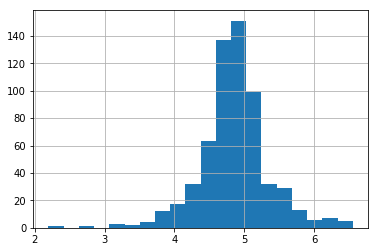

In [69]:
#since loan amount is skewed taking log transform
df['LoanAmount_log']=np.log(df['LoanAmount'])
df_test['LoanAmount_log']=np.log(df_test['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

In [72]:
#dropping loan variable
train=df.drop('Loan_ID',axis=1)
test=df_test.drop('Loan_ID',axis=1)

In [74]:
X=train.drop('Loan_Status',1)
y=train.Loan_Status
X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv=train_test_split(X,y,test_size=0.3)
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [76]:
pred_cv=model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.827027027027027

In [84]:
#cross validation
from sklearn.model_selection import StratifiedKFold
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.loc[train_index],X.loc[test_index]
    ytr,yvl=y[train_index],y[test_index]
    model=LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print(score)
    i+=1
    pred=model.predict_proba(xvl)[:,1]
    


1 of kfold 5
0.7983870967741935

2 of kfold 5
0.8306451612903226

3 of kfold 5
0.8114754098360656

4 of kfold 5
0.7950819672131147

5 of kfold 5
0.8278688524590164


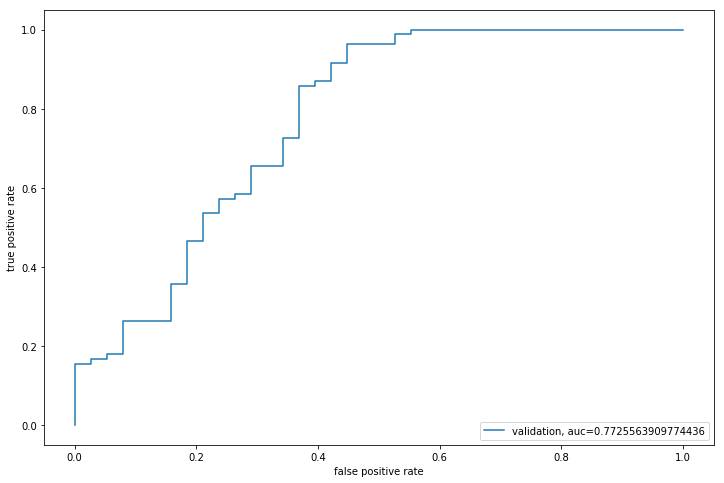

In [90]:
from sklearn import metrics
fpr,tpr,_=metrics.roc_curve(yvl,pred)
auc=metrics.roc_auc_score(yvl,pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label='validation, auc=' +str(auc))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

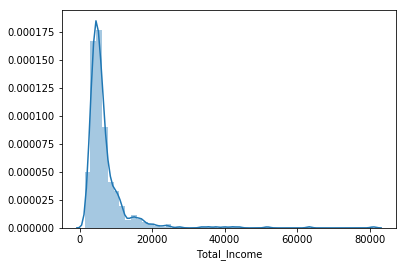

In [91]:
#creating new features

train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
sns.distplot(train['Total_Income'])

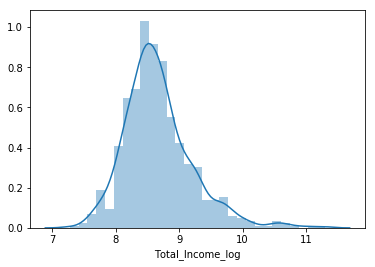

In [92]:
#since skeweked
train['Total_Income_log']=np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log'])

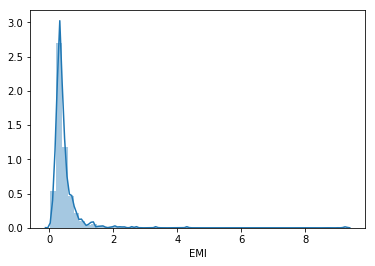

In [93]:
#lets create emi term
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
sns.distplot(train['EMI'])

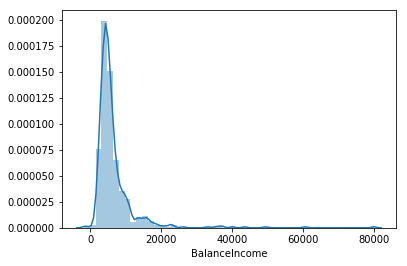

In [98]:
#creating balance income after emi
train['BalanceIncome']=train['Total_Income']-(train['EMI']*1000)
sns.distplot(train['BalanceIncome'])

In [99]:
#dropping variables used to create features
train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1) 

In [102]:
#final LR model
X=train.drop('Loan_Status',1)
y=train.Loan_Status
i=1
scores=0
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.loc[train_index],X.loc[test_index]
    ytr,yvl=y[train_index],y[test_index]
    model=LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print(score)
    scores+=score
    print(scores/i)
    i+=1
    pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
0.7983870967741935
0.7983870967741935

2 of kfold 5
0.8225806451612904
0.810483870967742

3 of kfold 5
0.7786885245901639
0.799885422175216

4 of kfold 5
0.7868852459016393
0.7966353781068218

5 of kfold 5
0.819672131147541
0.8012427287149656


In [103]:
#final tree model
X=train.drop('Loan_Status',1)
y=train.Loan_Status
from sklearn import tree
i=1
scores=0
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.loc[train_index],X.loc[test_index]
    ytr,yvl=y[train_index],y[test_index]
    model=tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print(score)
    scores+=score
    print(scores/i)
    i+=1
    pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
0.7258064516129032
0.7258064516129032

2 of kfold 5
0.7419354838709677
0.7338709677419355

3 of kfold 5
0.7049180327868853
0.7242199894235855

4 of kfold 5
0.680327868852459
0.7132469592808038

5 of kfold 5
0.7049180327868853
0.7115811739820201


In [104]:
#final rf model
X=train.drop('Loan_Status',1)
y=train.Loan_Status
from sklearn.ensemble import RandomForestClassifier
i=1
scores=0
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.loc[train_index],X.loc[test_index]
    ytr,yvl=y[train_index],y[test_index]
    model=RandomForestClassifier(random_state=1,max_depth=10)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print(score)
    scores+=score
    print(scores/i)
    i+=1
    pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
0.8225806451612904
0.8225806451612904

2 of kfold 5
0.8145161290322581
0.8185483870967742

3 of kfold 5
0.7377049180327869
0.7916005640754452

4 of kfold 5
0.7295081967213115
0.7760774722369117

5 of kfold 5
0.8114754098360656
0.7831570597567425


In [109]:
#doing grid search to find the best hyper parameter
from sklearn.model_selection import GridSearchCV
param_grid={'max_depth':list(range(1,20,2)),'n_estimators':list(range(1,200,20))}
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),param_grid)
from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv=train_test_split(X,y,test_size=0.3,random_state=1)
grid_search.fit(x_train,y_train)
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=141, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [110]:
#so we got the best hyper parameter
#final rf model
X=train.drop('Loan_Status',1)
y=train.Loan_Status
from sklearn.ensemble import RandomForestClassifier
i=1
scores=0
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.loc[train_index],X.loc[test_index]
    ytr,yvl=y[train_index],y[test_index]
    model=RandomForestClassifier(random_state=1,max_depth=3, n_estimators=141)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print(score)
    scores+=score
    print(scores/i)
    i+=1
    pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
0.8064516129032258
0.8064516129032258

2 of kfold 5
0.8306451612903226
0.8185483870967742

3 of kfold 5
0.8032786885245902
0.813458487572713

4 of kfold 5
0.7950819672131147
0.8088643574828134

5 of kfold 5
0.8278688524590164
0.8126652564780541


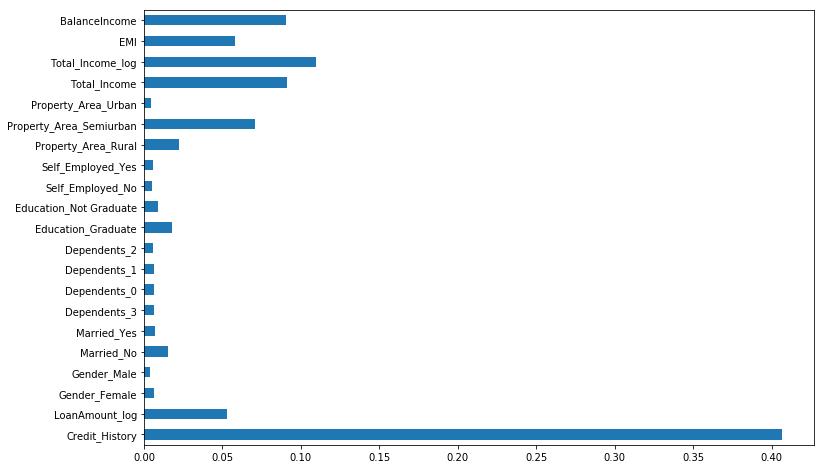

In [112]:
#check the feature importances
importances=pd.Series(model.feature_importances_,index=X.columns)
importances.plot(kind='barh',figsize=(12,8))

In [115]:
#using xgboost model
from xgboost import XGBClassifier
i=1
scores=0
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.loc[train_index],X.loc[test_index]
    ytr,yvl=y[train_index],y[test_index]
    model=XGBClassifier(n_estimators=50, max_depth=4)  
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print(score)
    scores+=score
    print(scores/i)
    i+=1
    pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
0.782258064516129
0.782258064516129

2 of kfold 5
0.8225806451612904
0.8024193548387097

3 of kfold 5
0.7622950819672131
0.7890445972148775

4 of kfold 5
0.7459016393442623
0.7782588577472237

5 of kfold 5
0.7868852459016393
0.7799841353781068
